### Deep Agents overview



Build agents that can plan, use subagents, and leverage file systems for complex tasks

deepagents is a standalone library for building agents that can tackle complex, multi-step tasks. Built on LangGraph and inspired by applications like Claude Code, Deep Research, and Manus, deep agents come with planning capabilities, file systems for context management, and the ability to spawn subagents.


### When to use deep agents
Use deep agents when you need agents that can:

- Handle complex, multi-step tasks that require planning and decomposition
- Manage large amounts of context through file system tools
- Delegate work to specialized subagents for context isolation
- Persist memory across conversations and threads

In [1]:
### Basic deep agent

import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")

In [2]:
from typing import Literal

In [3]:
### Tools- Internet search
from tavily import TavilyClient
from typing import Literal

tavily_client=TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

def web_search(query:str,max_results:int=5,
topic: Literal["general","sports","news","finance"]="general",
include_raw_content:bool=False):
    """Run a web search"""
    return tavily_client.search(query,
    max_results=max_results,include_raw_content=include_raw_content,topic=topic)



In [4]:
from langchain.chat_models import init_chat_model

model=init_chat_model("groq:qwen/qwen3-32b")
model

d:\foundational-training\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 16384, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000002094EF02FD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002094F184B50>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

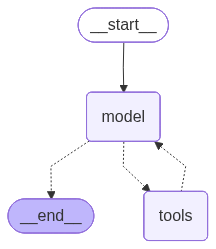

In [5]:
## Basic Agent
from langchain.agents import create_agent


simple_agent=create_agent(
    model=model,
    tools=[web_search]
)
simple_agent

In [9]:
%pip install deepagents

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


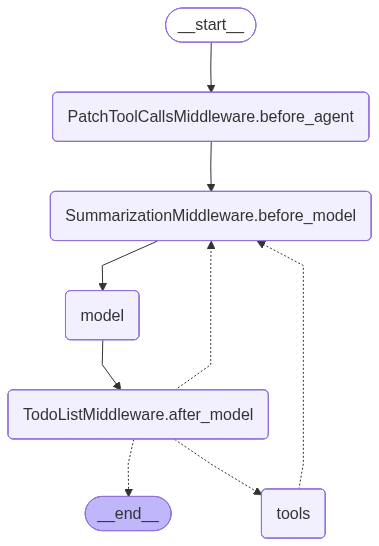

In [10]:
### Create a deep agent
## Prompt

## agent

from deepagents import create_deep_agent

deepagent=create_deep_agent(
    model=model,
    tools=[web_search],
    system_prompt="Act as a researcher"
)
deepagent

In [19]:
result = deepagent.invoke({"messages": [{"role": "user", "content": "What is AI"}]})
result

{'messages': [HumanMessage(content='What is AI', additional_kwargs={}, response_metadata={}, id='1148d890-4836-49d3-aa6c-1ce17b63fef7'),
  AIMessage(content='AI, or Artificial Intelligence, refers to systems or machines that can perform tasks requiring human-like intelligence. These tasks include learning from data, reasoning, problem-solving, understanding natural language, recognizing patterns, and making decisions. AI systems are designed to adapt and improve over time through experience.\n\n### Key Concepts:\n1. **Narrow AI**: Specialized systems focused on specific tasks (e.g., voice assistants like Siri, recommendation algorithms on Netflix, or image recognition tools). These dominate today\'s applications.\n2. **General AI**: A theoretical "strong AI" capable of understanding and performing any intellectual task a human can. It does not yet exist and remains a goal for future research.\n3. **Machine Learning (ML)**: A subset of AI where algorithms learn patterns from data withou

In [20]:
result["messages"][-1].content

'AI, or Artificial Intelligence, refers to systems or machines that can perform tasks requiring human-like intelligence. These tasks include learning from data, reasoning, problem-solving, understanding natural language, recognizing patterns, and making decisions. AI systems are designed to adapt and improve over time through experience.\n\n### Key Concepts:\n1. **Narrow AI**: Specialized systems focused on specific tasks (e.g., voice assistants like Siri, recommendation algorithms on Netflix, or image recognition tools). These dominate today\'s applications.\n2. **General AI**: A theoretical "strong AI" capable of understanding and performing any intellectual task a human can. It does not yet exist and remains a goal for future research.\n3. **Machine Learning (ML)**: A subset of AI where algorithms learn patterns from data without explicit programming (e.g., spam filters adapting to new threats).\n4. **Deep Learning**: A type of ML using neural networks with multiple layers to analyz

In [21]:
for field in result:
    print(f"{field} \n\n")

messages 




In [23]:
#files being optionally returned???
# result['files']

### What happened?

Your deep agent automatically:
- Planned its approach: Used the built-in write_todos tool to break down the research task
- Conducted research: Called the internet_search tool to gather information
- Managed context: Used file system tools (write_file, read_file) to offload large search results
- Spawned subagents (if needed): Delegated complex subtasks to specialized subagents
- Synthesized a report: Compiled findings into a coherent response

### Customizing Deep Agents

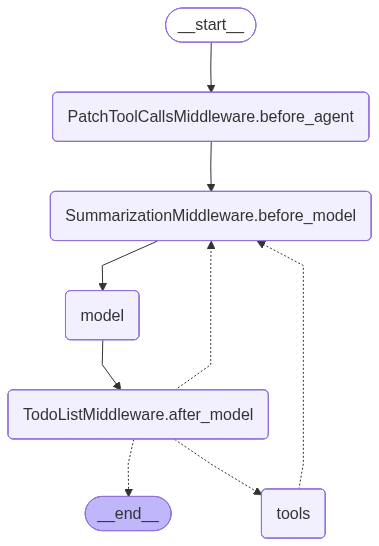

In [26]:
## #Model
from langchain.chat_models import init_chat_model
from deepagents import create_deep_agent

model = init_chat_model("groq:qwen/qwen3-32b")
agent = create_deep_agent(model=model)
agent

In [28]:
result = agent.invoke({"messages": [{"role": "user", "content": "What is deep agent?"}]})
result

{'messages': [HumanMessage(content='What is deep agent?', additional_kwargs={}, response_metadata={}, id='19cbbdf1-320e-4557-849e-3584cee681e8'),
  AIMessage(content='A "deep agent" typically refers to an AI agent that utilizes deep learning techniques, particularly deep neural networks, to perform tasks such as decision-making, perception, or problem-solving. These agents are often used in reinforcement learning scenarios where they learn optimal behaviors through interaction with an environment. Examples include systems like AlphaGo (for game playing) or autonomous vehicles (for real-time decision-making).\n\nIf you meant a different context (e.g., a specific framework, tool, or concept), please clarify!', additional_kwargs={'reasoning_content': 'Okay, the user is asking, "What is deep agent?" First, I need to understand what they\'re referring to. The term "deep agent" isn\'t one I\'m immediately familiar with. It could be a typo or a specific term in a certain context. Let me break

### System Prompt
Deep agents come with a built-in system prompt inspired by Claude Code’s system prompt. The default system prompt contains detailed instructions for using the built-in planning tool, file system tools, and subagents.
Each deep agent tailored to a use case should include a custom system prompt specific to that use case.

In [29]:
from deepagents import create_deep_agent

research_instructions = """\
You are an expert researcher. Your job is to conduct \
thorough research, and then write a polished report. \
"""

agent = create_deep_agent(
    model=model,
    system_prompt=research_instructions,
)
result = agent.invoke({"messages": [{"role": "user", "content": "What is deepagent?"}]})
result

InternalServerError: Error code: 503 - {'error': {'message': 'qwen/qwen3-32b is currently over capacity. Please try again and back off exponentially. Visit https://groqstatus.com to see if there is an active incident.', 'type': 'internal_server_error'}}

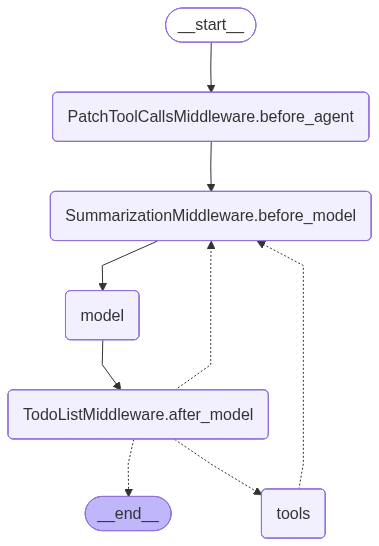

In [ ]:
agent

In [ ]:
### Tools
import os
from typing import Literal
from tavily import TavilyClient
from deepagents import create_deep_agent

tavily_client = TavilyClient(api_key=os.environ["TAVILY_API_KEY"])

def internet_search(
    query: str,
    max_results: int = 5,
    topic: Literal["general", "news", "finance"] = "general",
    include_raw_content: bool = False,
):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
        include_raw_content=include_raw_content,
        topic=topic,
    )

agent = create_deep_agent(
    model=model,
    tools=[internet_search]
)
result = agent.invoke({"messages": [{"role": "user", "content": "What is deepagent in Agentic AI?"}]})
result

{'messages': [HumanMessage(content='What is deepagent in Agentic AI?', additional_kwargs={}, response_metadata={}, id='69e9c583-1d34-434c-8e41-c738f304dd3f'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 179, 'prompt_tokens': 4518, 'total_tokens': 4697, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 4480}}, 'model_provider': 'openai', 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cw0gZziJDWPV92ctxVNPRkpCzTPZI', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019ba189-648b-7ad2-b64f-308d8b3b40e4-0', tool_calls=[{'name': 'internet_search', 'args': {'query': 'deepagent Agentic AI what is Deepagent', 'max_results': 5, 'topic': 'general', 'include_raw_content': False}, 'id': 'call_zeMOL3WtSWtgfh